#Importing data

In [1]:

!pip install -q kaggle
from google.colab import files
files.upload()
#upload your kaggle.json kaggle api


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"alexaman","key":"771c19cf0e7dbfd9403076eeb444c6eb"}'}

In [2]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download -d moltean/fruits

! mkdir fruits
! unzip fruits.zip -d fruits







Streaming output truncated to the last 5000 lines.
  inflating: fruits/fruits-360/Training/Tomato 3/112_100.jpg  
  inflating: fruits/fruits-360/Training/Tomato 3/113_100.jpg  
  inflating: fruits/fruits-360/Training/Tomato 3/114_100.jpg  
  inflating: fruits/fruits-360/Training/Tomato 3/115_100.jpg  
  inflating: fruits/fruits-360/Training/Tomato 3/116_100.jpg  
  inflating: fruits/fruits-360/Training/Tomato 3/117_100.jpg  
  inflating: fruits/fruits-360/Training/Tomato 3/119_100.jpg  
  inflating: fruits/fruits-360/Training/Tomato 3/120_100.jpg  
  inflating: fruits/fruits-360/Training/Tomato 3/121_100.jpg  
  inflating: fruits/fruits-360/Training/Tomato 3/122_100.jpg  
  inflating: fruits/fruits-360/Training/Tomato 3/123_100.jpg  
  inflating: fruits/fruits-360/Training/Tomato 3/124_100.jpg  
  inflating: fruits/fruits-360/Training/Tomato 3/125_100.jpg  
  inflating: fruits/fruits-360/Training/Tomato 3/126_100.jpg  
  inflating: fruits/fruits-360/Training/Tomato 3/127_100.jpg  
  in

Data link from Kaggle - > https://www.kaggle.com/moltean/fruits

In [3]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from keras.preprocessing.image  import ImageDataGenerator, img_to_array,load_img
import matplotlib.pyplot as plt
from glob import glob

train_path = "/content/fruits/fruits-360/Training/"
test_path = "/content/fruits/fruits-360/Test/"

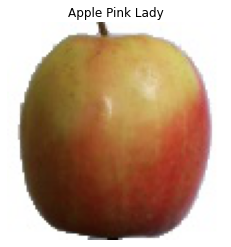

In [4]:
img = load_img(train_path + "Apple Pink Lady/0_100.jpg")
plt.imshow(img)
plt.title("Apple Pink Lady")
plt.axis("off")
plt.show()

In [5]:
shape_of_image = img_to_array(img)
print(shape_of_image.shape)



(100, 100, 3)


#Number of classes- Number of different types of fruits and vegetables

In [8]:
classes = glob(train_path + "/*")
number_of_class = len(classes)
print("Number of class : " , number_of_class)


Number of class :  131


#Creating flow /generator to record shape of image arrays and zooming them for better results

In [9]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                   shear_range = 0.3,
                   horizontal_flip = True,
                   zoom_range = 0.3)
test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(train_path,
                                                   target_size = shape_of_image.shape[:2],
                                                   batch_size = 32,
                                                   color_mode = 'rgb',
                                                   class_mode = 'categorical')
test_generator = test_datagen.flow_from_directory(test_path,
                                                   target_size = shape_of_image.shape[:2],
                                                   batch_size = 32,
                                                   color_mode = 'rgb',
                                                   class_mode = 'categorical')

Found 67692 images belonging to 131 classes.
Found 22688 images belonging to 131 classes.


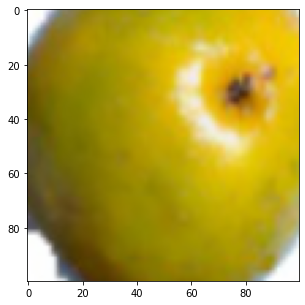

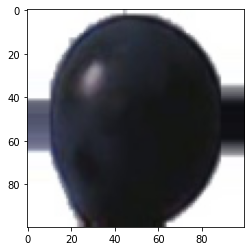

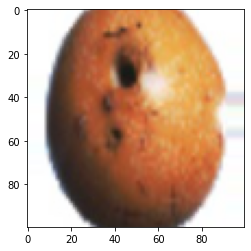

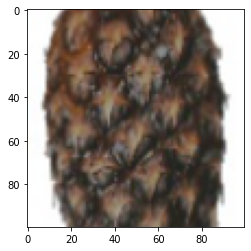

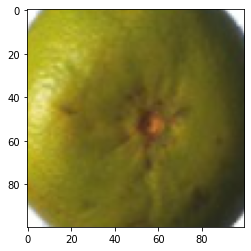

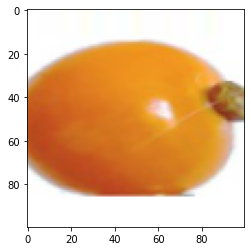

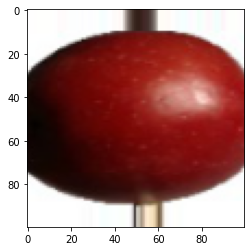

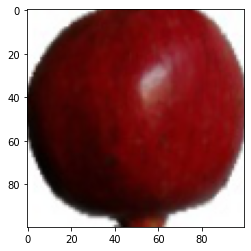

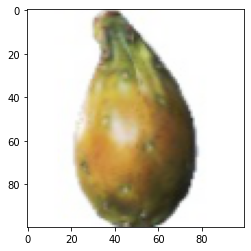

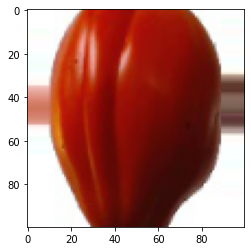

In [10]:
x,y = train_generator.next()
fig = plt.figure(figsize =(30,5))
for i in range(10):
 image = x[i]
 plt.imshow(image)
 plt.show()
    
   

#Custom CNN Architeture
no padding as edges have no information \
INPUT-CNN-MAXPOOL-CNN-MAXPOOL-CNN-MAXPOOL-FLATTEN-OUTPUT \



In [11]:
model = Sequential() 
model.add(Conv2D(32,(3,3),activation = 'relu', input_shape = shape_of_image.shape))
model.add(MaxPooling2D())
model.add(Conv2D(32,(3,3),activation = 'relu', input_shape = shape_of_image.shape))
model.add(MaxPooling2D())
model.add(Conv2D(64,(3,3),activation = 'relu', input_shape = shape_of_image.shape))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(1024,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(number_of_class,activation = 'softmax'))
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'rmsprop',
              metrics = ['accuracy'])
batch_size = 32
number_of_batch = 1600 // batch_size
hist = model.fit_generator(
    generator = train_generator,
    steps_per_epoch = number_of_batch,
    epochs = 100,
    validation_data = test_generator,
    validation_steps = 800 // batch_size
                   )
 

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/100
50/50 [==============================] - 5s 98ms/step - loss: 4.7025 - accuracy: 0.0281 - val_loss: 4.2296 - val_accuracy: 0.0838
Epoch 2/100
50/50 [==============================] - 5s 96ms/step - loss: 3.9105 - accuracy: 0.1031 - val_loss: 3.1097 - val_accuracy: 0.2488
Epoch 3/100
50/50 [==============================] - 5s 96ms/step - loss: 3.0703 - accuracy: 0.2056 - val_loss: 2.3821 - val_accuracy: 0.3887
Epoch 4/100
50/50 [==============================] - 5s 95ms/step - loss: 2.4628 - accuracy: 0.2981 - val_loss: 1.8419 - val_accuracy: 0.4700
Epoch 5/100
50/50 [==============================] - 5s 96ms/step - loss: 2.0612 - accuracy: 0.4075 - val_loss: 1.5325 - val_accuracy: 0.5375
Epoch 6/100
50/50 [==============================] - 5s 99ms/step - loss: 1.7354 - accuracy: 0.4831 - val_loss: 1.1770 - val_accuracy: 0.6675
Epoch 7/100
50/50 [==============================] - 5s 99ms/step - loss

#overfitting check

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


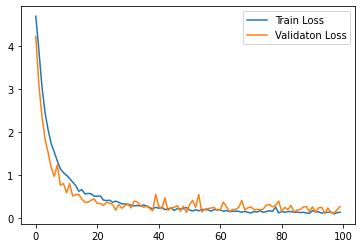

In [12]:
print(hist.history.keys())
plt.plot(hist.history["loss"],label = "Train Loss")
plt.plot(hist.history["val_loss"],label = "Validaton Loss")
plt.legend()
plt.show()

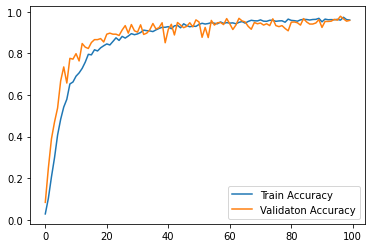

In [13]:
plt.figure()
plt.plot(hist.history["accuracy"],label = "Train Accuracy")
plt.plot(hist.history["val_accuracy"],label = "Validaton Accuracy")
plt.legend()
plt.show()

#VGG 13
 RESEARCH PAPER -> https://arxiv.org/pdf/1409.1556.pdf /


In [14]:
vggmodel = Sequential() 
vggmodel.add(Conv2D(64,(3,3),activation = 'relu', input_shape = shape_of_image.shape))
vggmodel.add(Conv2D(64,(3,3),activation = 'relu'))
vggmodel.add(MaxPooling2D(2, 2))

vggmodel.add(Conv2D(128,(3,3),activation = 'relu'))
vggmodel.add(Conv2D(128,(3,3),activation = 'relu'))
vggmodel.add(MaxPooling2D(2,2))

vggmodel.add(Conv2D(256,(3,3),activation = 'relu'))
vggmodel.add(Conv2D(256,(3,3),activation = 'relu'))
vggmodel.add(Conv2D(256,(3,3),activation = 'relu'))
vggmodel.add(MaxPooling2D(2,2))

vggmodel.add(Conv2D(512,(3,3),activation = 'relu'))
vggmodel.add(Conv2D(512,(3,3),activation = 'relu'))
vggmodel.add(Conv2D(512,(3,3),activation = 'relu'))
vggmodel.add(MaxPooling2D(2,2))




vggmodel.add(Flatten())
vggmodel.add(Dense(1024,activation='relu'))
vggmodel.add(Dropout(0.5))
vggmodel.add(Dense(number_of_class,activation = 'softmax'))
vggmodel.compile(loss = 'categorical_crossentropy',
              optimizer = 'rmsprop',
              metrics = ['accuracy'])
batch_size = 32
number_of_batch = 1600 // batch_size
hist1 = vggmodel.fit_generator(
    generator = train_generator,
    steps_per_epoch = number_of_batch,
    epochs = 100,
    validation_data = test_generator,
    validation_steps = 800 // batch_size
                   )
 

Epoch 1/100
50/50 [==============================] - 6s 119ms/step - loss: 8.2613 - accuracy: 0.0056 - val_loss: 4.8729 - val_accuracy: 0.0100
Epoch 2/100
50/50 [==============================] - 6s 116ms/step - loss: 4.9451 - accuracy: 0.0113 - val_loss: 4.8717 - val_accuracy: 0.0188
Epoch 3/100
50/50 [==============================] - 6s 119ms/step - loss: 4.8712 - accuracy: 0.0106 - val_loss: 4.8652 - val_accuracy: 0.0100
Epoch 4/100
50/50 [==============================] - 6s 118ms/step - loss: 4.8759 - accuracy: 0.0106 - val_loss: 4.8316 - val_accuracy: 0.0200
Epoch 5/100
50/50 [==============================] - 6s 115ms/step - loss: 5.3421 - accuracy: 0.0156 - val_loss: 4.6771 - val_accuracy: 0.0137
Epoch 6/100
50/50 [==============================] - 6s 117ms/step - loss: 4.6902 - accuracy: 0.0188 - val_loss: 4.5420 - val_accuracy: 0.0237
Epoch 7/100
50/50 [==============================] - 6s 117ms/step - loss: 4.4984 - accuracy: 0.0231 - val_loss: 4.3834 - val_accuracy: 0.0262

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


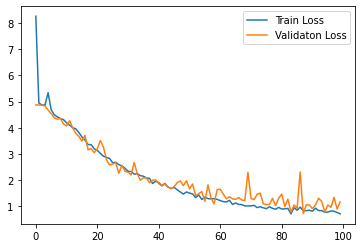

In [15]:
print(hist1.history.keys())
plt.plot(hist1.history["loss"],label = "Train Loss")
plt.plot(hist1.history["val_loss"],label = "Validaton Loss")
plt.legend()
plt.show()

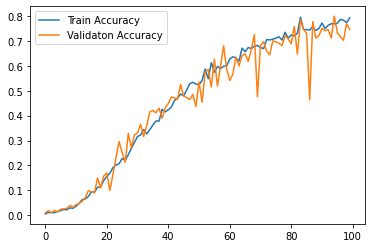

In [16]:
plt.figure()
plt.plot(hist1.history["accuracy"],label = "Train Accuracy")
plt.plot(hist1
         .history["val_accuracy"],label = "Validaton Accuracy")
plt.legend()
plt.show()

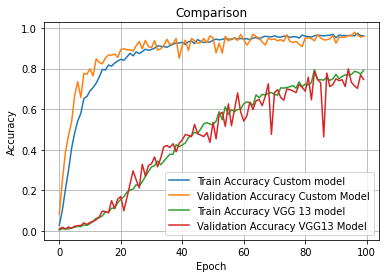

In [17]:
plt.grid()
plt.title("Comparison")
plt.plot(hist.history['accuracy'],
         label = 'Train Accuracy Custom model')
plt.plot(hist.history['val_accuracy'],  label = 'Validation Accuracy Custom Model')

plt.plot(hist1.history['accuracy'],
         label = 'Train Accuracy VGG 13 model')
plt.plot(hist1.history['val_accuracy'],  label = 'Validation Accuracy VGG13 Model')

plt.legend()
plt.xlabel('Epoch')
plt.ylabel("Accuracy")
plt.show()

#Custom CNN prediction results

In [18]:
x,y=train_generator.next()
y_pred=model.predict(x)
y_vggpred=vggmodel.predict(x)

In [19]:
classnamess=list(test_generator.class_indices.keys())

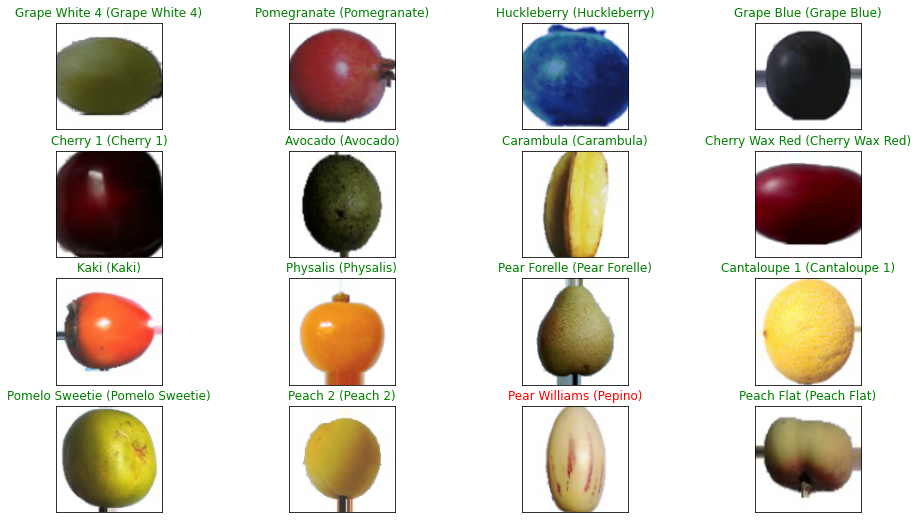

In [20]:
import numpy as np

fig = plt.figure(figsize=(16, 9))
for i, idx in enumerate(np.random.choice(len(test_generator), size=16, replace=False)):
    ax = fig.add_subplot(4, 4, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x[i]))
    pred_idx = np.argmax(y_pred[i])
    true_idx = np.argmax(y[i])
    ax.set_title("{} ({})".format(classnamess[pred_idx], classnamess[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))

#VGG 13  predictions results

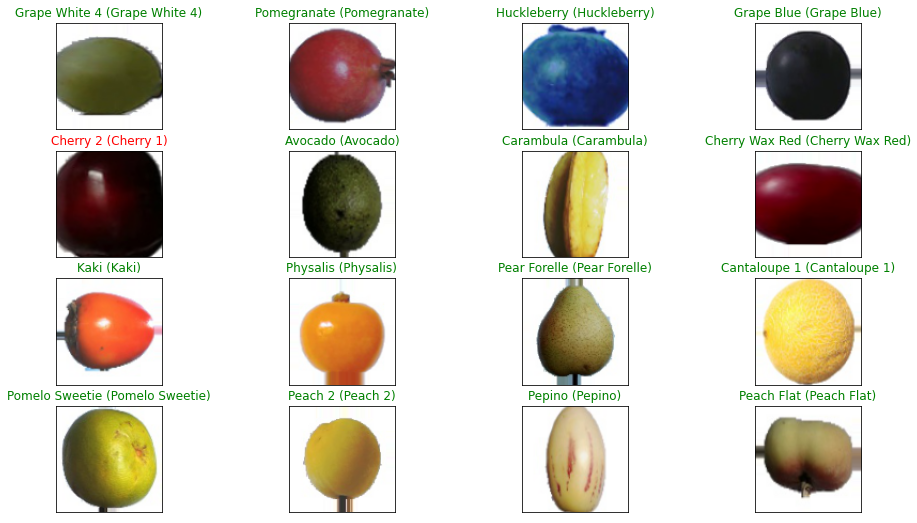

In [21]:
import numpy as np

fig = plt.figure(figsize=(16, 9))
for i, idx in enumerate(np.random.choice(len(test_generator), size=16, replace=False)):
    ax = fig.add_subplot(4, 4, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x[i]))
    pred_idx = np.argmax(y_vggpred[i])
    true_idx = np.argmax(y[i])
    ax.set_title("{} ({})".format(classnamess[pred_idx], classnamess[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))

In [27]:
model.save_weights('/content/cnn.h5')
vggmodel.save_weights('/content/vggcnn.h5')


In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 47, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 21, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 10, 10, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6400)              0

In [31]:
vggmodel.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 98, 98, 64)        1792      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 96, 96, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 48, 48, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 46, 46, 128)       73856     
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 44, 44, 128)       147584    
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 22, 22, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 20, 20, 256)      